# Overview
In this implementation, we will be looking at the following the steps as follows:

1.    Importing Libraries and Dataset
2.    Scaling the dataset
3.    Checking Multicollinearity and removing it
4.    Creating test and training partitions
5.    Implementing the Linear Regression model
6.    Generating predictions over the test set
7.    Evaluating the model
8.    Preparing the Residual plot.
9.    Checking the Assumptions of Linear Regression.
10.   Visualising the Coefficient plot





## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


## Scaling the dataset

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


## Checking and Removing Multicollinearity

In [5]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [6]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

### Calculating VIF

In [7]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [8]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [9]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [10]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


### Remaining Columns

In [11]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

## Train/Test set

In [12]:
X = vif_data
Y = data['Sale_Price']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept= True)
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [16]:
predictions = lr.predict(x_test)

In [17]:
lr.score(x_test, y_test)

0.8461987715586199

### 1. Residuals

In [18]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [19]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

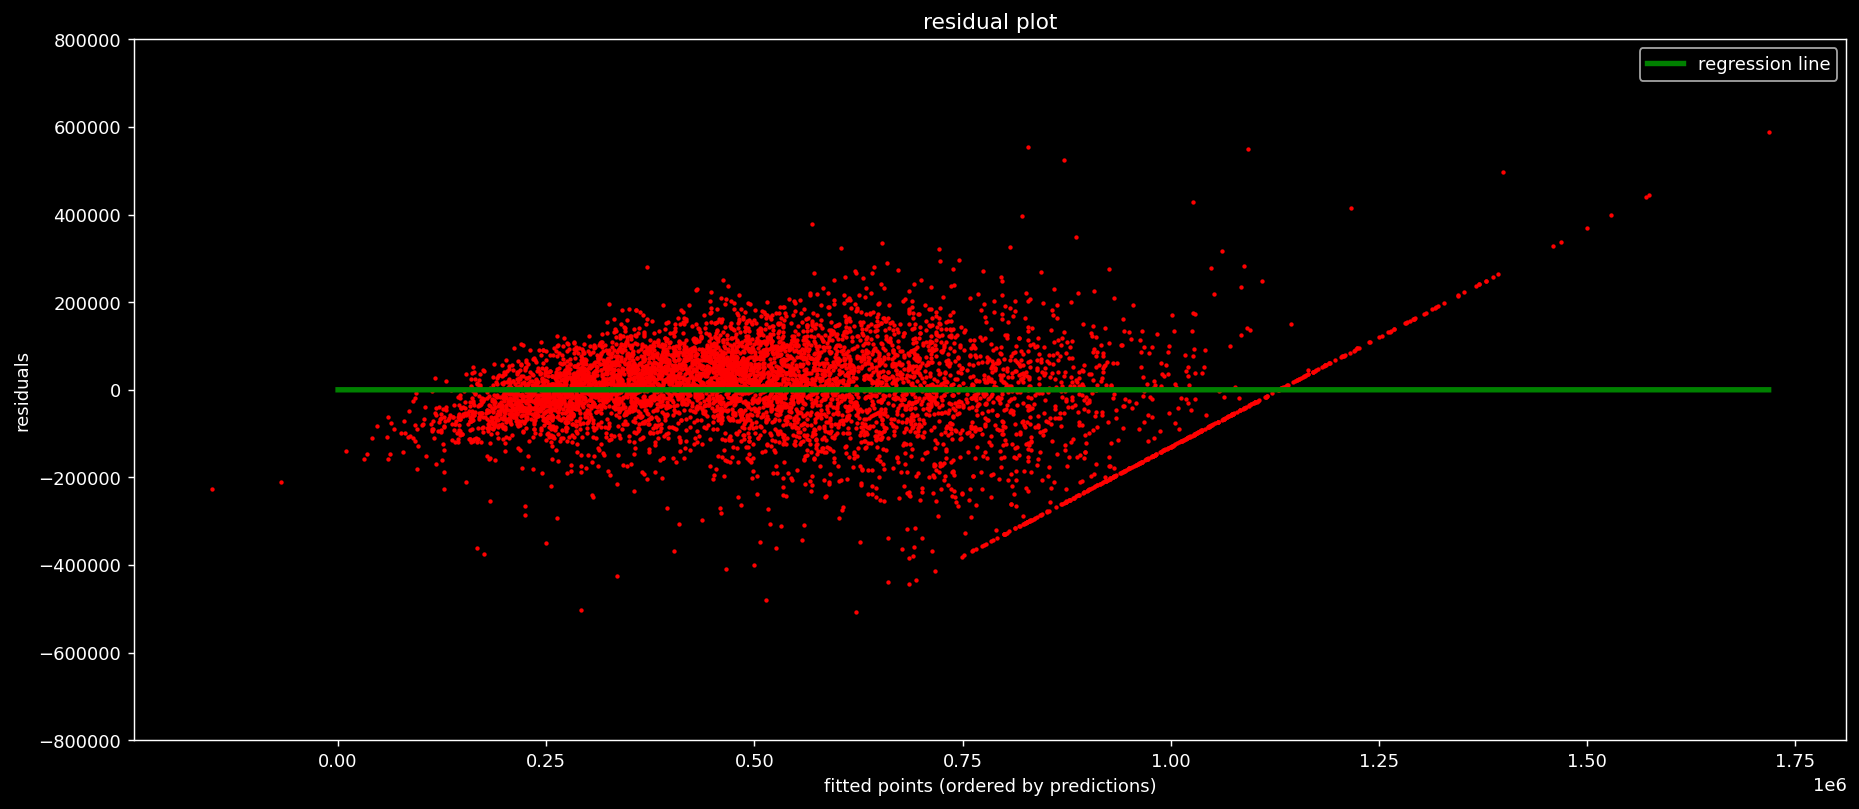

In [20]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## 2. Distribution of errors

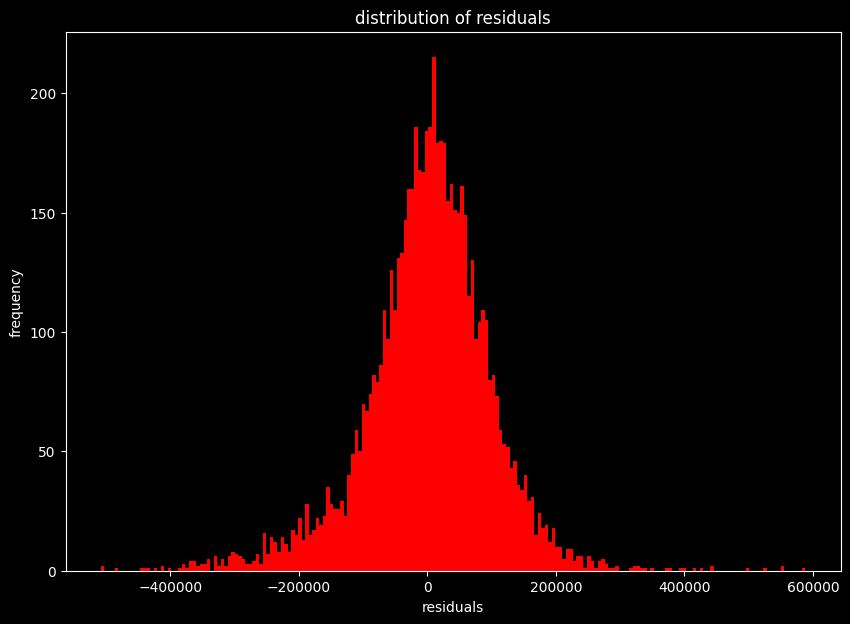

In [21]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model Coefficients

In [22]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


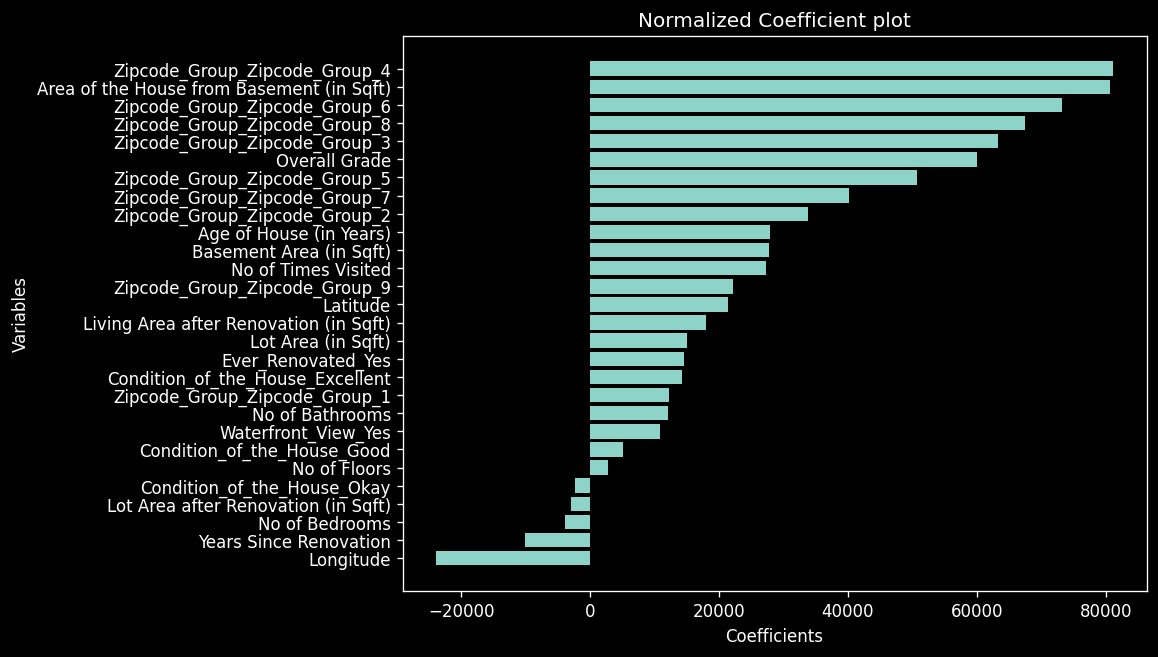

In [23]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

In [24]:
# agar end="" to agla sentence me break nahi lagega sedha continue hoga 


In [25]:
print("hello brother how are you?", end= "") 
print("i'm great how are you brother?")

hello brother how are you?i'm great how are you brother?


In [26]:
var1 = '54'
var4 = ' 36'
var2 = 36.7
var3 = 4
print(type(var1))
print(var2 + var3)


<class 'str'>
40.7


In [27]:
print(float(var3))

4.0


In [28]:
print(int(var1) + int(var4))

90


```
there are serveral type casting and they are
float()
str()
int()
```

In [29]:
#print vyom 5 times
for i in range(5):
    print('vyom')


vyom
vyom
vyom
vyom
vyom


In [30]:
vyom = ['my name is vyom yadav']
print(vyom[::1])

['my name is vyom yadav']


In [31]:
print(100 * 'hello world\n')

hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hello world
hell

In [32]:
a = 'Enter your number'
inp = input()
print("your entered number is ",int(inp)+10)

your entered number is  20


In [33]:
print("Enter your first number")
msg1 = int(input())
print("Enter your second number")
msg2 = int(input())
print("the result is:", msg1 + msg2)



Enter your first number


ValueError: invalid literal for int() with base 10: ''

In [ ]:
mystr = "harry is a good boy"
print(len(mystr))
print(mystr[4])

19
y


In [ ]:
print(mystr[::-1])

yob doog a si yrrah


In [ ]:
print(mystr[0:4])

harr


In [ ]:
print(mystr[::1])

harry is a good boy


In [ ]:
print(mystr[-4:-2:-2])

In [ ]:
print(mystr.isalpha()) #isalpha means ki string ke bech me koi gap hai ki nahi, aur hamare string me gap hai so it returned false

True


In [ ]:
print(mystr.isnumeric()) #isnumeric means kya meri string numeric hai ya nahi but hamari string to nahi hai so it retured false

False


In [ ]:
print(mystr.replace('good', 'bad')) #replace sedha words ko replace kar deta hai

harry is a bad boy


In [ ]:
print(mystr.capitalize()) #first character capital kar dega

Harry is a good boy


In [ ]:
print(mystr.upper())# puri string upper case me kar dega

HARRY IS A GOOD BOY


In [ ]:
print(mystr.endswith('boy'))# retuens true or false whether the string ends with specific word or not

True


In [ ]:
print(mystr.split())#split the words into different split

['harry', 'is', 'a', 'good', 'boy']


In [ ]:
grocery = ["almond","dhania","vim bar", "martini",56]
print(grocery)

['almond', 'dhania', 'vim bar', 'martini', 56]


In [ ]:
print(grocery[0])

almond


In [ ]:
print(grocery[4])

56


In [ ]:
print(grocery.append('potatoes'))

None


In [ ]:
print(grocery)

['almond', 'dhania', 'vim bar', 'martini', 56, 'harpic', 'potatoes']


In [ ]:
numbers = [2,1,4,6,55,3,0,100]
numbers.sort()
print(numbers)

[0, 1, 2, 3, 4, 6, 55, 100]


In [ ]:
print(numbers.reverse())

None


In [ ]:
numbers

[100, 55, 6, 4, 3, 2, 1, 0]

In [ ]:
numbers.count(55)

1

In [ ]:
numbers.append(69)

In [ ]:
numbers

[100, 55, 6, 4, 3, 2, 1, 0, 69]

In [ ]:
numbers.insert(2,10)

In [ ]:
print(numbers)

[100, 55, 10, 6, 4, 3, 2, 1, 0, 69]


In [ ]:
numbers.pop()
numbers

[100, 55, 10, 6, 4, 3, 2, 1, 0]

In [ ]:
numbers.remove(0)
numbers

[100, 55, 10, 6, 4, 3, 2, 1]

``` swap numbers using both traditional and python way```

In [ ]:
a = 5
b = 2
temp = a
a = b 
b = temp 
print(a, b)

2 5


In [ ]:
a, b = b,a

In [ ]:
print(a,b)

5 2


In [ ]:
dict1 = {'harry ': 'burger', 'vyom':'pizza','yash ': 60,'vagisha': {'maggi':'pasta','pizza':'biryani'}}
print(dict1['vagisha'])

{'maggi': 'pasta', 'pizza': 'biryani'}


In [ ]:
dict1['vyom'],dict1['vagisha']

('pizza', {'maggi': 'pasta', 'pizza': 'biryani'})

In [ ]:
dict1['shubhangi'] = 'chowmeen'

In [ ]:
print(dict1)

{'harry ': 'burger', 'vyom': 'pizza', 'yash ': 60, 'vagisha': {'maggi': 'pasta', 'pizza': 'biryani'}, 'shubhangi': 'chowmeen'}


In [ ]:
del dict1['shubhangi']

In [ ]:
print(dict1)

{'harry ': 'burger', 'vyom': 'pizza', 'yash ': 60, 'vagisha': {'maggi': 'pasta', 'pizza': 'biryani'}}


In [ ]:
print(dict1.copy())

{'harry ': 'burger', 'vyom': 'pizza', 'yash ': 60, 'vagisha': {'maggi': 'pasta', 'pizza': 'biryani'}}


In [ ]:
d3 = dict1.copy()

In [ ]:
del d3['vyom']

In [ ]:
dict1

{'harry ': 'burger',
 'vyom': 'pizza',
 'yash ': 60,
 'vagisha': {'maggi': 'pasta', 'pizza': 'biryani'}}

In [ ]:
print(dict1.update({'vyom':'pizza'}))

None


In [ ]:
dict1

{'harry ': 'burger',
 'vyom': 'pizza',
 'yash ': 60,
 'vagisha': {'maggi': 'pasta', 'pizza': 'biryani'}}

In [ ]:
print(dict1.keys())

dict_keys(['harry ', 'vyom', 'yash ', 'vagisha'])


In [ ]:
print(dict1.items())

dict_items([('harry ', 'burger'), ('vyom', 'pizza'), ('yash ', 60), ('vagisha', {'maggi': 'pasta', 'pizza': 'biryani'})])


In [ ]:
print(dict1.popitem())

('vagisha', {'maggi': 'pasta', 'pizza': 'biryani'})


In [ ]:
dict1

{'harry ': 'burger', 'vyom': 'pizza', 'yash ': 60}

``` create a dictionary and take the input from the  user and return the meaning of that word.```

In [ ]:
inp = input("Enter the name of the word ")
dict1 = {'serendipity':'to found somenone by luck', 'set' : 'set is a collection of interrelated items','bamboozled':'to trick someone','slayer':'to kill'}
if (inp == 'serendipity'):
    print('to found somenone by luck')
elif (inp == 'set'):
    print("set is a collection of interrelated items")
elif(inp == 'bamboozled'):
    print('to trick someone')
else:
    print('to kill')
        

to found somenone by luck


In [ ]:
D1 = {'serendipity':'to found somenone by luck', 'set' : 'set is a collection of interrelated items','bamboozled':'to trick someone','slayer':'to kill'}
print('Enter your words')
inp = input()
print(dict1[inp])

Enter your words
set is a collection of interrelated items


In [ ]:
s = set()
my_new_set = set([1,2,3,4])
print(my_new_set)

{1, 2, 3, 4}


In [ ]:
my_new_set.add(5)

In [ ]:
print(my_new_set)

{1, 2, 3, 4, 5}


In [ ]:
print(s.add(1))

None


In [ ]:
s

{1}

In [ ]:
print(s.add(2))

None


In [ ]:
s

{1, 2}

In [ ]:
print(s.add(2))

None


In [ ]:
s


{1, 2}

In [ ]:
var1 = 66
var2= 45
var3 = int(input())
if var3 == var2:
    print('equal')
elif var3 > var2:
    print("greater")
else:
    print("lesser")

greater


In [ ]:
list1 = [5,7,3,'vyom']
if 'yash' not in list1:
    print("No the item is not  in list")

No the item is not  in list


In [ ]:
print("Enter your age:")
age = int(input())
if age > 18:
    print("youre eligible for liscence")
elif age == 18:
    print("we cannot decide visit the centre physically")
else:
    print("you're not eligible for liscence")

Enter your age:
you're not eligible for liscence


``` exercise calculator```

In [ ]:
inp1 = int(input("Enter the first number"))
opr = input("Enter the operator you want to use")
inp2 = int(input("Enter the second number"))
addition = '+'
subtraction = '-' 
multiplication = '*'    
division = '/' 
if opr == '+':
    if inp2 == 9 and inp1 ==56:
        print("The output is 77")
    else:
     print("the output is:",inp1 + inp2)
elif opr == '*':
    if inp1 == 45 and inp2 == 3:
        print("The output is 555")
    else:
        print("The output is:", inp1 * inp2)
elif opr == '-':
    if inp1 == 888 and inp2 == 632:
        print("the output is : 401")
    else:
        print("The output is:", inp1 - inp2)
elif opr == '/':
    if inp1 == 56 and inp2 == 6:
        print("The output is: 4")
    else:
        print("The output is:", inp1 / inp2)
    
        
        
        
        

The output is 555


In [ ]:
list1 = ["Harry", "Larry","Carry","Marie"]
print(list1)

['Harry', 'Larry', 'Carry', 'Marie']


In [ ]:
for i in list1:
    print(i)

Harry
Larry
Carry
Marie


In [62]:
list1 = [1,2,3,4,5,6,7,8,9,10,11,'vyom','yash','sujal','vrishi']
for num in list1:
        if str(num).isnumeric() and num > 6:
            print(num)

7
8
9
10
11


In [63]:
print(type(num))

<class 'str'>


In [73]:
i = 0 
while(i<45):
    print(i)
    i = i+2

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44


In [91]:
num = int(input("Enter the number:"))
while(1):
    if num <= 100:
        print("Try again...")
        break
    else:
        print("congrats!")
        continue

Try again...


In [12]:
num = 18
number_of_guesses = 1
num = int(input("Enter the number : \n"))
while (number_of_guesses <= 9):
    guess_the_number = int(input('enter your guess : '))
    if (guess_the_number >= 20):
        print("Enter lesse number : ")
    elif (guess_the_number <=10):
        print("enter bigger number : ")
    elif (guess_the_number > 10 and guess_the_number < 20):
        print("you are closer to the number")
    elif (guess_the_number  == num):
        print("your are winner")
        guess_the_number = guess_the_number +1
        break
if (number_of_guesses > 9):
    print("you loose")
        

enter bigger number : 
enter bigger number : 
you are closer to the number
you are closer to the number
you are closer to the number
Enter lesse number : 
you are closer to the number
you are closer to the number
Enter lesse number : 
you are closer to the number


ValueError: invalid literal for int() with base 10: ''

In [14]:
n=18
number_of_guesses=1
print("Number of guesses is limited to only 9 times: ")
while (number_of_guesses<=9):
    guess_number = int(input("Guess the number :\n"))
    if guess_number<18:
        print("you enter less number please input greater number.\n")
    elif guess_number>18:
        print("you enter greater number please input smaller number.\n ")
    else:
        print("you won\n")
        print(number_of_guesses,"no.of guesses he took to finish.")
        break
    print(9-number_of_guesses,"no. of guesses left")
    number_of_guesses = number_of_guesses + 1

if(number_of_guesses>9):
    print("Game Over")

Number of guesses is limited to only 9 times: 
you enter greater number please input smaller number.
 
8 no. of guesses left
you enter less number please input greater number.

7 no. of guesses left
you won

3 no.of guesses he took to finish.


In [16]:
num = 18
number_of_guesses = 1
print("You have total 9 guesses")
while(number_of_guesses <=9):
    guess_number = int(input("Enter your guess"))
    if(guess_number < 19):
        print("guessed number is less")
    elif(guess_number > 18):
        print("Enter less number")
    if(guess_number == 18):
        print("you won\n","number of guess left\n", 9-number_of_guesses)
        number_of_guesses = number_of_guesses +1
        break
else:
    print("You loose")
                       

You have total 9 guesses
guessed number is less
Enter less number
guessed number is less
you won
 number of guess left
 8


``` assignment operator```

In [1]:
x  = 5
print(x)

5


In [3]:
x += 7 #matlab x me 7 jod do
print(x)

19


In [6]:
# se 7 divide kar do
x /= 7
print(x) # or x = x/7 

0.05539358600583091


In [7]:
i = 8
print( i == 5)

False


``` logical operator```

In [8]:
a = True
b = False
print(a and a)

True


In [9]:
print(a and b)

False


In [10]:
print(a or b)

True


In [13]:
print(a is a)

True


In [14]:
print(a is not b)

True


In [15]:
print(i is not 5)

True


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\vyomy\AppData\Local\Temp\ipykernel_36476\3082512874.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  print(i is not 5)


``` membership functions```

list1 = [2,3,5,67]
list1[:-1]

``` bitwise operator```

In [3]:
list1 = [1,2,4,6,435,5,32,51]
list1[:-1]

[1, 2, 4, 6, 435, 5, 32]

```short if else```

In [2]:
a = int(input("Enter the number a"))
b = int(input("Enter the number b"))
if a > b: print("a b se bada hai bhai")

In [7]:
def function1 ():
     pow = print("the power of 5 raise 2 is", 5**2)
     return pow    
print(function1())

    
    

the power of 5 raise 2 is 25
None


In [11]:
def func2():
    """ this is a function which calculate average of two numbers"""
    inp1 = int(input("Enter the number a"))
    inp2 = int(input("Enter the number b"))
    average = (inp1+inp2)/2
    return average
print(func2())


5.0


In [13]:
def func3(a,b):
    print("The sum of two numbers is:",a+b)
func3(5,7)

The sum of two numbers is: 12


In [16]:
inp1 = int(input("Enter the first number:"))
inp2 = int(input("Enter the second number:"))
try:
    print("The sum of two numbers is",inp1+inp2)
except Exception as e:
    print(e)
    
print("this is very important")

ValueError: invalid literal for int() with base 10: 'e'

In [1]:
from math import cube

ImportError: cannot import name 'cube' from 'math' (unknown location)

In [2]:
https://www.guvi.in/sign-in/?sourceUri=https%3A%2F%2Fwww.guvi.in%2Fcourses%3Fcurrent_tab%3DmyCourses%26__sta%3Dvhg.uosvpxVFFVcszsevhec%257CJFH%26__stm_medium%3Demail%26__stm_source%3Dsmartech

SyntaxError: invalid syntax (4271968605.py, line 1)

In [3]:
it= iter([1,2,3]) next(it) next(it) next(it) next(it)

SyntaxError: invalid syntax (2373246997.py, line 1)

In [5]:
__vyom = 'john'
print(type(__vyom))

<class 'str'>


In [7]:
x = 'sdsdaf'
print(len(x))

6


In [8]:
x[0]

's'

In [9]:
x=x[0]

In [11]:
txt = 'Hello'
txt[2:5]

'llo'

In [13]:
fruits = ["apple", "banana", "cherry", "orange", "kiwi", "melon", "mango"] 
print(fruits[2:5])

['cherry', 'orange', 'kiwi']


In [14]:
fruits.remove("apple")

In [15]:
fruits

['banana', 'cherry', 'orange', 'kiwi', 'melon', 'mango']

In [16]:
print(len(fruits))

6
